In [1]:
"""
Harris Corner Detector
"""

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def conv2(img, conv_filter):
    # flip the filter
    f_siz_1, f_size_2 = conv_filter.shape
    conv_filter = conv_filter[range(f_siz_1 - 1, -1, -1), :][:, range(f_siz_1 - 1, -1, -1)]
    pad = (conv_filter.shape[0] - 1) // 2
    result = np.zeros((img.shape))
    img = np.pad(img, ((pad, pad), (pad, pad)), 'constant', constant_values=(0, 0))
    filter_size = conv_filter.shape[0]
    for r in np.arange(img.shape[0] - filter_size + 1):
        for c in np.arange(img.shape[1] - filter_size + 1):
            curr_region = img[r:r + filter_size, c:c + filter_size]
            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result)  # Summing the result of multiplication.
            result[r, c] = conv_sum  # Saving the summation in the convolution layer feature map.

    return result

In [3]:
def fspecial(shape=(3, 3), sigma=0.5):
    m, n = [(ss - 1.) / 2. for ss in shape]
    y, x = np.ogrid[-m:m + 1, -n:n + 1]
    h = np.exp(-(x * x + y * y) / (2. * sigma * sigma))
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

In [43]:

# Parameters, add more if needed
sigma = 2
thresh = 0.01
k = 0.05

"""
bw: input grayscale image.
sigma: the sigma for the window (gaussian filter).
thresh: Use to perform thresholding, 
find points whose surrounding window gave large conrner response (R > thresh*R.max()).
k: emprical constant k = 0.01 - 0.1, decrease false positive.
"""
def harris(bw, sigma, thresh, k):
    # Derivative masks
    dx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    dy = dx.transpose()

    # computer x and y derivatives of image
    Ix = conv2(bw, dx)
    Iy = conv2(bw, dy)

    # Generate the window function that is a gaussian filter with size 13 by 13 and sigma = 2
    g = fspecial((max(1, np.floor(3 * sigma) * 2 + 1), max(1, np.floor(3 * sigma) * 2 + 1)), sigma)

    Iy2 = conv2(np.power(Iy, 2), g)
    Ix2 = conv2(np.power(Ix, 2), g)
    Ixy = conv2(Ix * Iy, g)

    ######################################################################
    # Task: Compute the Harris Cornerness
    ######################################################################

    # calculate determinant
    detM = Ix2 * Iy2 - Ixy * Ixy

    # calculate trace
    traceM = Ix2 + Iy2

    # measure of corner response: (Cornerness)
    R = detM - k*(traceM**2)
    
    corner_points = find_corners(R, thresh)
    #return detected corner points
    return corner_points
    

In [8]:
######################################################################
# Task: Perform non-maximum suppression and
#       thresholding, return the N corner points
#       as an Nx2 matrix of x and y coordinates
######################################################################

"""
Perform non-maximum suppression and thresholding,
return the N corner points as an Nx2 matrix of x and y coordinates

Parameter R: Corner strength matrix
Parameter thresh: Use to perform thresholding, 
find points whose surrounding window gave large conrner response (R > thresh*R.max()).
"""
def find_corners(R, thresh):
    corner_points = []
    # Use 2 for-loop to go through every non-border points
    for i in range(1, R.shape[0]-1):
        for j in range(1, R.shape[1]- 1):
            # Non-maximum suppression, select corners that are 8-way local maxima
            if (R[i, j] > R[i- 1, j - 1] and R[i, j] > R[i, j - 1] and R[i, j] > R[i-1, j]\
            and  R[i, j] > R[i + 1, j + 1] and  R[i, j] > R[i, j + 1] and  R[i, j] > R[i + 1, j]\
            and  R[i, j] > R[i - 1, j + 1] and  R[i, j] > R[i + 1, j - 1]):
                # R > threshold
                if R[i, j] > thresh*R.max():
                    # store corner points
                    corner_points.append([i, j])
    return corner_points
                
        

In [41]:

img1_or = cv.imread(r"C:\Users\wenji\Documents\computer_vision\Harris-1.jpg")
img2_or = cv.imread(r"C:\Users\wenji\Documents\computer_vision\Harris-2.jpg")
img3_or = cv.imread(r"C:\Users\wenji\Documents\computer_vision\Harris-3.jpg")
img4_or = cv.imread(r"C:\Users\wenji\Documents\computer_vision\Harris-4.jpg")

img1 = cv.cvtColor(img1_or,cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2_or,cv.COLOR_BGR2GRAY)
img3 = cv.cvtColor(img3_or,cv.COLOR_BGR2GRAY)
img4 = cv.cvtColor(img4_or,cv.COLOR_BGR2GRAY)

In [12]:
imgf1 = np.float32(img1)
imgf2 = np.float32(img2)
imgf3 = np.float32(img3)
imgf4 = np.float32(img4)

In [ ]:
# Harris corner detection from my algorithm

In [20]:
img_out1 = harris(img1, sigma, thresh, k)

In [45]:
img_out2 = harris(img2, sigma, thresh, k)

In [44]:
img_out3 = harris(img3, sigma, thresh, k)
img_out4 = harris(img4, sigma, thresh, k)

In [ ]:
# Harris corner detection from in_build algorithm

In [52]:
dst1 = cv.cornerHarris(imgf1, 8, 3, 0.05) #blockSize = 8, ksize = 3, k = 0.05
out1 = find_corners(dst1, thresh)

dst2 = cv.cornerHarris(img2, 8, 3, 0.05) #blockSize = 8, ksize = 3, k = 0.05
out2 = find_corners(dst2, thresh)

dst3 = cv.cornerHarris(imgf3, 8, 3, 0.05) #blockSize = 8, ksize = 3, k = 0.05
out3 = find_corners(dst3, thresh)

dst4 = cv.cornerHarris(imgf4, 8, 3, 0.05) #blockSize = 8, ksize = 3, k = 0.05
out4 = find_corners(dst4, thresh)

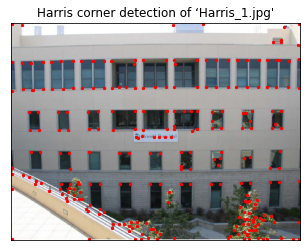

In [33]:
img_out1 = np.array(img_out1)
plt.title("Harris corner detection of ‘Harris_1.jpg'")
fig = plt.imshow(cv.cvtColor(img1_or, cv.COLOR_BGR2RGB))
plt.scatter(img_out1[:, 1],img_out1[:, 0],c = 'r', s = 5)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig("Task1myout1.png")

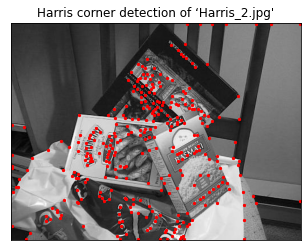

In [34]:
img_out2 = np.array(img_out2)
plt.title("Harris corner detection of ‘Harris_2.jpg'")
fig = plt.imshow(cv.cvtColor(img2_or, cv.COLOR_BGR2RGB))
plt.scatter(img_out2[:, 1],img_out2[:, 0],c = 'r', s = 5)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig("Task1myout2.png")

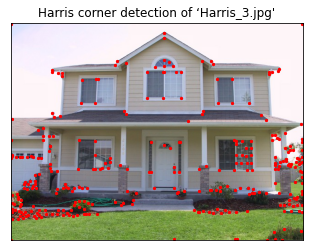

In [46]:
img_out3 = np.array(img_out3)
plt.title("Harris corner detection of ‘Harris_3.jpg'")
fig = plt.imshow(cv.cvtColor(img3_or, cv.COLOR_BGR2RGB))
plt.scatter(img_out3[:, 1],img_out3[:, 0],c = 'r', s = 5)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig("Task1myout3.png")

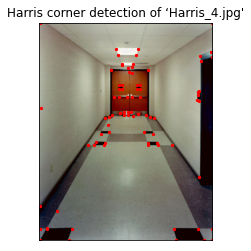

In [47]:
img_out4 = np.array(img_out4)
plt.title("Harris corner detection of ‘Harris_4.jpg'")
fig = plt.imshow(cv.cvtColor(img4_or, cv.COLOR_BGR2RGB))
plt.scatter(img_out4[:, 1],img_out4[:, 0],c = 'r', s = 5)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig("Task1myout4.png")

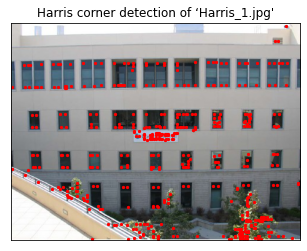

In [53]:
out1 = np.array(out1)
plt.title("Harris corner detection of ‘Harris_1.jpg'")
fig = plt.imshow(cv.cvtColor(img1_or, cv.COLOR_BGR2RGB))
plt.scatter(out1[:, 1],out1[:, 0],c = 'r', s = 5)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig("Task1inout1.png")

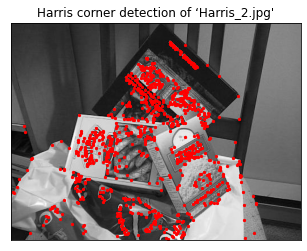

In [49]:
out2 = np.array(out2)
plt.title("Harris corner detection of ‘Harris_2.jpg'")
fig = plt.imshow(cv.cvtColor(img2_or, cv.COLOR_BGR2RGB))
plt.scatter(out2[:, 1],out2[:, 0],c = 'r', s = 5)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig("Task1inout2.png")

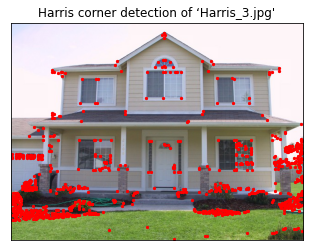

In [50]:
out3 = np.array(out3)
plt.title("Harris corner detection of ‘Harris_3.jpg'")
fig = plt.imshow(cv.cvtColor(img3_or, cv.COLOR_BGR2RGB))
plt.scatter(out3[:, 1],out3[:, 0],c = 'r', s = 5)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig("Task1inout3.png")

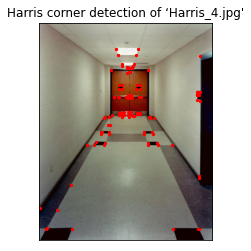

In [51]:
out4 = np.array(out4)
plt.title("Harris corner detection of ‘Harris_4.jpg'")
fig = plt.imshow(cv.cvtColor(img4_or, cv.COLOR_BGR2RGB))
plt.scatter(out4[:, 1],out4[:, 0],c = 'r', s = 5)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig("Task1inout4.png")

91057890.0